In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input,LSTM,Dense
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical


In [ ]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()
x_train,x_test=x_train/255.0,x_test/255.0

y_train= to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
input_shape=(28,28)
inputs = Input(shape=input_shape)
rnn_layer = LSTM(128)(inputs)
outputs = Dense(10,activation='softmax')(rnn_layer)
model=Model(inputs=inputs,outputs=outputs)

In [ ]:
model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [ ]:
history=model.fit(x_train,y_train,epochs=5,batch_size=64,validation_split=0.2)

Epoch 1/5
750/750 [==============================] - 45s 58ms/step - loss: 0.4825 - accuracy: 0.8435 - val_loss: 0.1606 - val_accuracy: 0.9508
Epoch 2/5
750/750 [==============================] - 45s 60ms/step - loss: 0.1418 - accuracy: 0.9563 - val_loss: 0.1273 - val_accuracy: 0.9613
Epoch 3/5
750/750 [==============================] - 43s 58ms/step - loss: 0.0966 - accuracy: 0.9703 - val_loss: 0.0907 - val_accuracy: 0.9730
Epoch 4/5
750/750 [==============================] - 44s 59ms/step - loss: 0.0748 - accuracy: 0.9772 - val_loss: 0.0767 - val_accuracy: 0.9772
Epoch 5/5
750/750 [==============================] - 44s 58ms/step - loss: 0.0584 - accuracy: 0.9816 - val_loss: 0.0587 - val_accuracy: 0.9827


In [ ]:
y_pred=model.predict(x_test)
y_pred

313/313 [==============================] - 7s 20ms/step


array([[4.2196257e-06, 9.0165471e-05, 1.7876751e-04, ..., 9.9957067e-01,
        9.6452786e-06, 3.8963113e-05],
       [2.3679283e-06, 2.8230645e-05, 9.9990648e-01, ..., 1.3676012e-05,
        2.8738043e-05, 1.8929150e-07],
       [4.5215634e-06, 9.9939477e-01, 4.0737053e-05, ..., 1.2265667e-04,
        2.2826358e-04, 3.4929155e-05],
       ...,
       [1.2919935e-04, 4.5062614e-05, 1.1721193e-04, ..., 2.1254660e-04,
        4.3578178e-04, 1.6780132e-04],
       [1.1286878e-04, 6.0015373e-05, 1.0822229e-05, ..., 1.0370622e-05,
        1.0510474e-03, 9.1945360e-05],
       [1.9522393e-04, 9.2108567e-06, 4.3643631e-05, ..., 8.1938475e-07,
        6.5971668e-05, 8.6366686e-07]], dtype=float32)

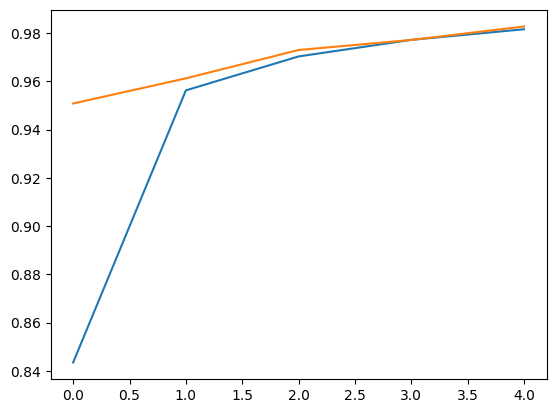

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])